# Models with immunity

## SIR-O - a modified SIR with explicit confirmed cases
This model is modified [SIR](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model): 
- **S** is *Susceptible*
- **I** is *Infectious*
- **R** is *Recovered* (and *diseased*). The model expects that this pool becomes 100% immune.
- **O** is *cOnfirmed* individuals, both hospitalized and quorantined at home with a positive test

The model utilises three parameters: $\alpha$,$\beta$ and $k$:
- $\alpha$ models the speed of infection spread,
- $\beta$ represents the speed of recovery (and deaths)
- $k$ is the reveal factor, how many infectious people are confirmed as positive.

The differential equations:<br>
$\frac{dS}{dt} = -\alpha S I$,<br>
$\frac{dI}{dt} = \alpha S I - \beta I$, <br>
$\frac{dR}{dt} = \beta I$,<br>
$\frac{dO}{dt} = k I$.


# Models without immunity

## SIRS-O - a SIR model without antigen and with explicit confirmed cases
This model is modified [SIR](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model): 
- **S** is *Succeptible*
- **I** is *Infectious*
- **R** is *Recovered* (and *diseased*). While in **R** state people are immune.
- **O** is *cOnfirmed* individuals, both hospitalized and quorantined at home with a positive test

The major feature of this model is conversion of some or recovered back into succeptible.

The model utilises three parameters: $\alpha$,$\beta$ and $k$:
- $\alpha$ models the speed of infection spread,
- $\beta$ represents the speed of recovery (and deaths),
- $r_s$ is the ratio of recovered people who are susceptible again,
- $k$ is the reveal factor, how many infectious people are confirmed as positive.

The differential equations:
$\frac{dS}{dt} = -\alpha S I + r_s R$,<br>
$\frac{dI}{dt} = \alpha S I - \beta I$, <br>
$\frac{dR}{dt} = \beta I - r_s R$,<br>
$\frac{dO}{dt} = k I$.

## SIRC-O - a SIR model with carriers and with explicit confirmed cases
This model is modified [SIR](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model): 
- **S** is *Succeptible*
- **I** is *Infectious*, i.e. with syptoms of the disease.
- **C** is *Carrier*, i.e. infectious, but without symptoms or actual illness.
- **R** is *Recovered* (and *diseased*). While in **R** state people are immune.
- **O** is *cOnfirmed* individuals, both hospitalized and quorantined at home with a positive test

The major feature of this model is having people carry the virus and infect others without actually being ill.

The model utilises three parameters: $\alpha$,$\beta$ and $k$:
- $\alpha$ models the speed of infection spread,
- $\beta$ represents the speed of recovery (and deaths),
- $c_s$ models efficiency of infection transmission by carriers compared to infectious.
- $i_r$ is the ratio of infectious, who recovered (became immune), and $1 - i_r$ become carriers.
- $c_r$ represents the speed of recovery of carriers.
- $k$ is the reveal factor, how many infectious people are confirmed as positive.

The differential equations:
$\frac{dS}{dt} = -\alpha S I - c_s \alpha S C$,<br>
$\frac{dI}{dt} = \alpha S I + c_s \alpha S C - \beta I$, <br>
$\frac{dR}{dt} = \beta i_r I$,<br>
$\frac{dC}{dt} = \beta (1 - i_r) I$,<br>
$\frac{dO}{dt} = k (I + C)$.



In [1]:
country  = 'China'
country2 = 'China'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit
from scipy.integrate import odeint
from datetime import datetime

%matplotlib inline

In [3]:
print("Computed on: ", datetime.now().strftime(format='%y-%m-%d %T'))

Computed on:  20-05-08 18:42:35


In [4]:
import corona

In [5]:
info = corona.CovidModel(country, country2)
print("Country: ", info.country)
print("Population: ", info.population)
print("Number of revealed cases: ", info.data[0][-1])
print("Number of deaths: ", info.data[1][-1])

Country:  China
Population:  1392730000.0
Number of revealed cases:  83975
Number of deaths:  4637


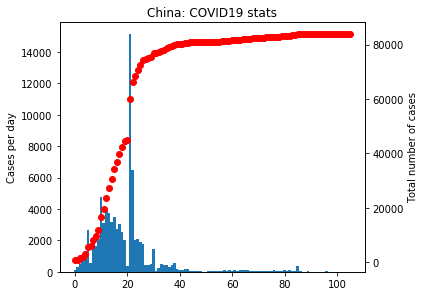

In [6]:
delta = info.data[:,1:] - info.data[:,:-1]

days = np.arange(np.shape(delta)[1])
fig, ax1 = plt.subplots()

ax1.bar(days, delta[0], width=1.0)
ax1.set_ylabel('Cases per day')

ax2 = ax1.twinx()
ax2.plot(days, info.data[0][1:], 'o', color='red')
ax2.set_ylabel('Total number of cases')
fig.tight_layout()

plt.title(info.country + ": COVID19 stats");

# Models without immunity

## Some of recovered become susceptible again

Progress: [####################] 100.0% 7273.165505610265


,alpha,beta,recovered to susceptible,reveal efficiency,Infected initial,Recovered initial,R0,Precision
0,3.12,3.15,0.0343,0.000241,104034.5,18266.2,0.99,7.27e+03
1,3.25,3.29,0.0536,0.00122,68468.4,61385.3,0.989,7.38e+03
2,2.05,2.09,0.034,1.88e-06,109402.0,65914.2,0.982,7.46e+03
3,2.97,3.01,0.0951,2.5e-09,39513.7,775.8,0.987,7.5e+03
4,2.88,2.92,0.102,4.52e-10,36875.6,27859.5,0.986,7.51e+03
5,1.76,1.8,0.0509,3.78e-06,74308.8,14377.9,0.977,7.53e+03
6,2.45,2.49,0.1,0.00032,37856.5,12754.2,0.983,7.54e+03
7,3.41,3.45,0.276,0.000661,13796.5,1116.3,0.988,7.56e+03
8,2.7,2.74,0.191,0.00501,19898.3,76146.7,0.985,7.57e+03
9,2.94,2.98,0.411,0.000265,9363.2,4301.3,0.985,7.58e+03


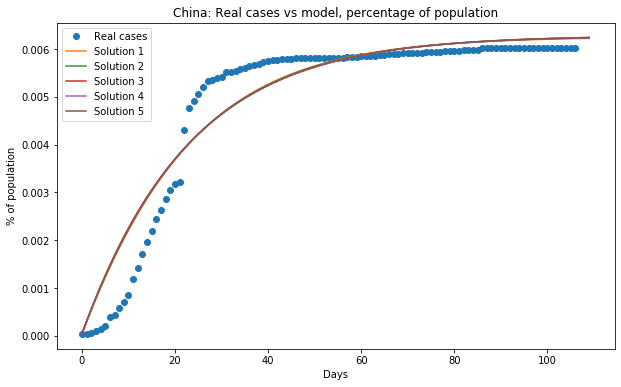

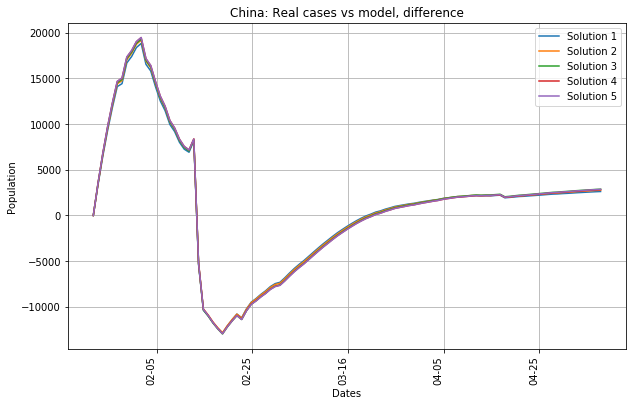

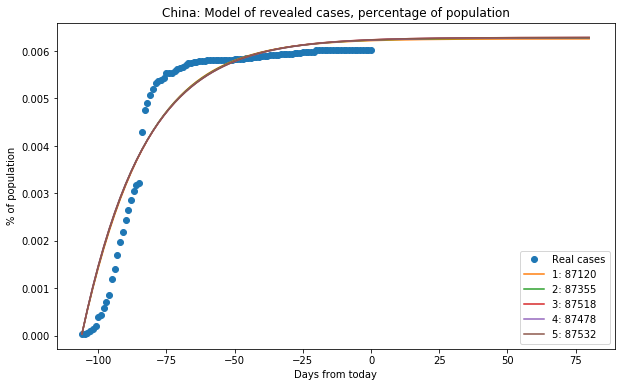

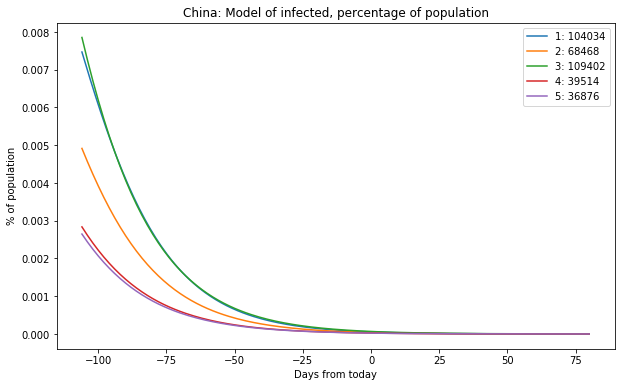

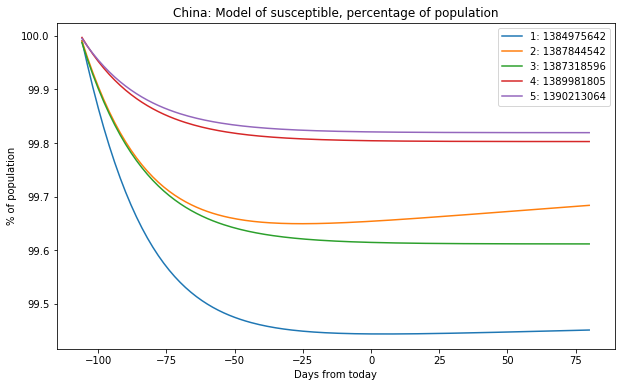

In [7]:
test_sirs = corona.CovidModel(country, country2, model='sir_so_r0')
test_sirs.run(300)

## Part of the population are symptom-less infectious carriers
Recovered posess immunity

Progress: [####################] 100.0% 1953.7748970164523


,alpha,beta,carrier efficiency,infectious to recovered,carrier recovery,reveal efficiency,Initial infected,Initial carrier,Initial recovered,R0,Precision
0,2.66,2.44,0.986,1,1.01,0.000853,109600.0,96832.9,109600.0,1.09,1.95e+03
1,2.78,2.55,0.98,1,1.3,0.000922,107085.2,93794.9,109256.7,1.09,1.99e+03
2,3.58,3.72,0.24,0.617,2.78,0.000997,109600.0,64656.3,109600.0,0.961,2.37e+03
3,3.15,3.18,0.511,0.815,2.97,0.000952,109599.8,51214.9,109600.0,0.991,2.44e+03
4,3.08,2.89,0.427,0.947,2.18,0.000927,109600.0,55041.6,109600.0,1.06,2.49e+03
5,2.83,2.63,0.64,0.954,2.54,0.000774,109342.0,49086.4,109356.1,1.08,2.62e+03
6,3.29,3.3,0.208,0.688,2.2,0.000776,109519.2,109420.7,109222.7,0.998,2.64e+03
7,2.64,3.61,0.54,0.209,2.92,0.000533,108816.7,104102.6,108264.1,0.729,2.85e+03
8,2.36,3.05,0.777,0.574,2.1,0.000447,109600.0,47319.0,109600.0,0.775,3.01e+03
9,2.4,3.12,0.675,0.429,2.52,0.000463,109600.0,75667.2,109600.0,0.769,3.01e+03


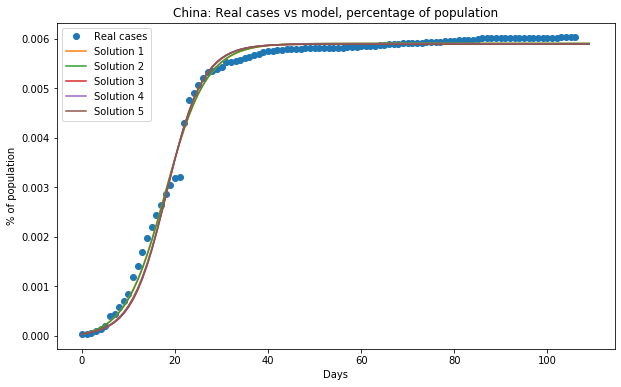

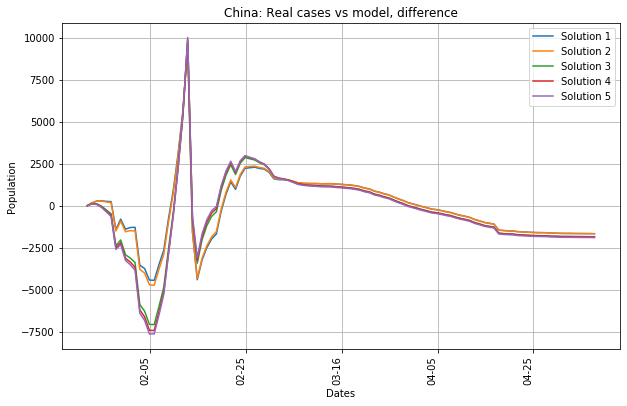

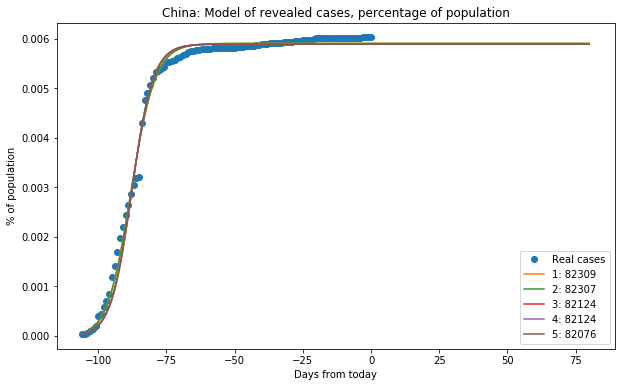

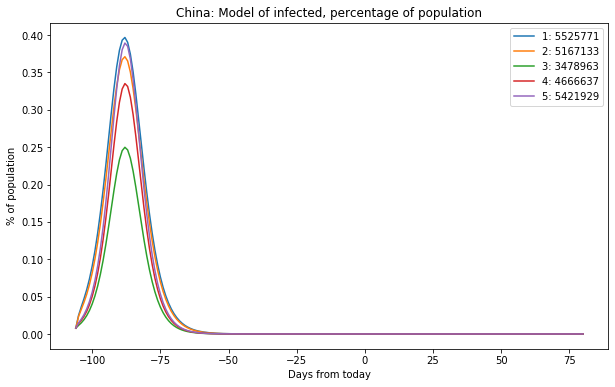

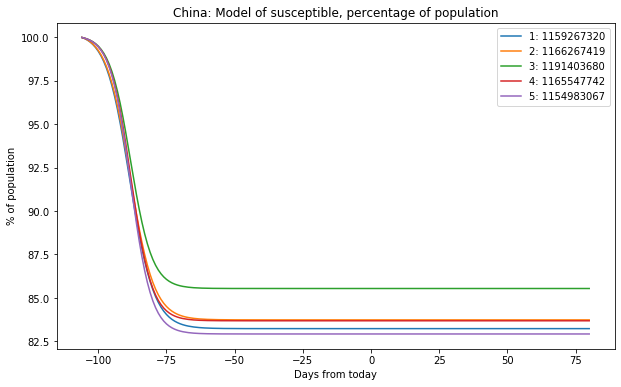

In [8]:
test_sirc = corona.CovidModel(country, country2, model='sir_co')
test_sirc.run(300)

## Part of the population are symptom-less infectious carriers, and recovered loose the immunity

Progress: [####################] 100.0% 2467.5774700396805


,alpha,beta,carrier efficiency,infectious to recovered,carrier recovery,recovered to susceptible,reveal efficiency,Initial infected,Initial carrier,Initial recovered,R0,Precision
0,3.06,3.66,0.515,0.696,1.67,0.0149,0.000537,109600.0,94249.0,109599.4,0.838,2.47e+03
1,2.2,1.99,0.469,0.825,2.13,0.0157,0.000305,109596.0,29487.2,109502.1,1.1,3.25e+03
2,1.88,1.98,0.437,0.481,1.32,0.0166,0.00015,95527.1,56585.2,103306.4,0.948,3.8e+03
3,1.41,1.5,0.00673,0.0266,0.383,0.537,0.0183,54937.2,45179.8,320.4,0.939,6.61e+03
4,0.557,0.662,0.0663,0.739,0.159,1.73,0.0238,103349.8,47055.0,22314.7,0.842,7.05e+03
5,2.02,2.07,0.00111,0.313,0.833,1.02e-08,0.0302,48614.1,17158.1,3743.7,0.977,7.15e+03
6,1.24,1.33,0.297,0.982,0.262,1.1,0.031,23992.0,21958.1,72698.2,0.933,7.16e+03
7,2.73,3.54,0.413,0.56,2.28,2.14e-05,0.017,109112.1,50236.1,109170.4,0.771,7.24e+03
8,2.56,2.99,0.494,0.697,2.91,2.65e-05,0.0195,107078.9,5427.8,109025.1,0.856,7.28e+03
9,0.702,0.853,0.844,0.933,0.371,2.79,0.0337,27256.1,70820.0,60315.6,0.823,7.3e+03


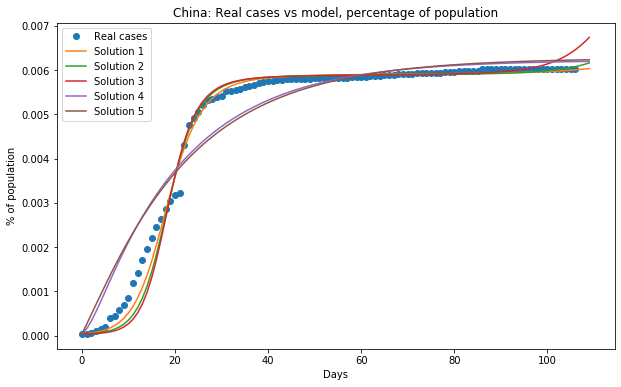

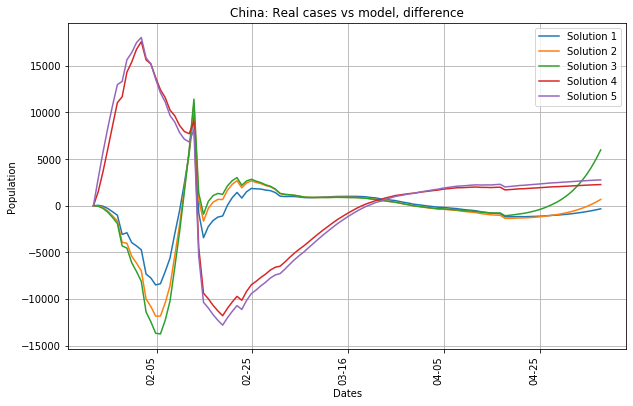

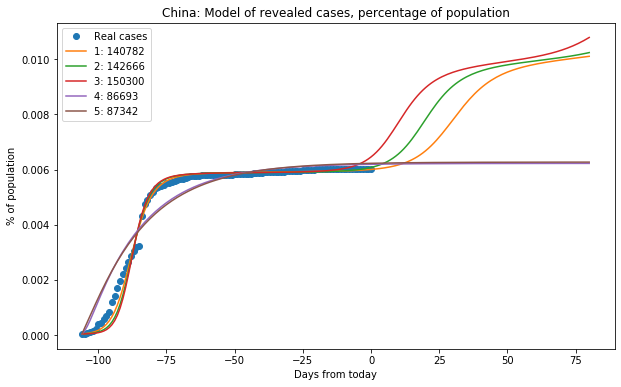

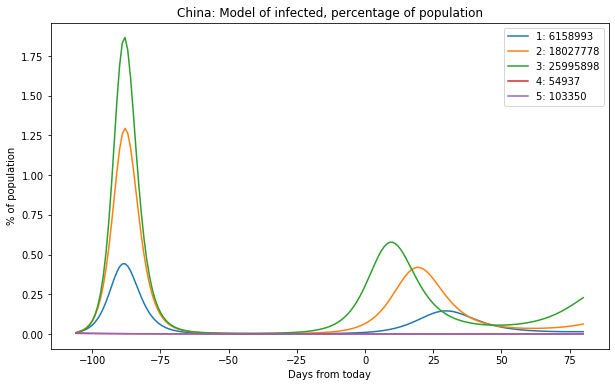

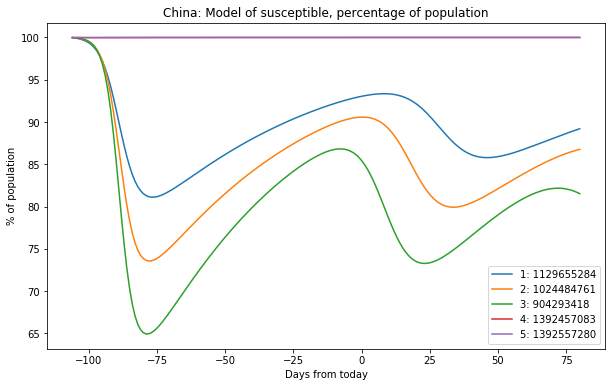

In [9]:
test_sir_sco = corona.CovidModel(country, country2, model='sir_sco')
test_sir_sco.run(300)


## Experimental model with carriers and no immunity
The major change from the previous model - difference in revealing efficiency for infectious and carriers

Progress: [####################] 100.0% 6541.025078708002


,alpha,beta,carrier efficiency,infectious to recovered,carrier recovery,recovered to susceptible,Infectious reveal efficiency,Carrier reveal efficiency,Initial infected,Initial carrier,Initial recovered,R0,Precision
0,0.424,0.527,0.0666,0.519,0.192,2.17,0.0243,0.0312,85869.6,47505.5,272.9,0.805,6.54e+03
1,1.32,1.57,0.0266,0.224,0.257,0.278,0.0132,0.0268,50377.3,109600.0,21635.6,0.838,6.76e+03
2,2.52,2.57,0.811,1,0.405,1.83,0.0102,0.0129,72581.1,53366.8,68322.0,0.979,6.8e+03
3,0.653,1.16,0.108,0.346,0.163,1.92,0.000383,0.0407,61893.2,55613.7,31962.9,0.561,7e+03
4,1.66,1.71,0.855,1,0.839,1.85,0.0201,0.000171,18772.6,71301.0,109524.3,0.972,7.01e+03
5,1.18,1.54,0.594,0.839,0.602,0.00936,0.0485,0.000185,4853.9,26784.0,104984.6,0.767,7.01e+03
6,2.22,2.26,1.91e-05,0.379,0.849,2.97,0.0102,0.0286,71461.2,104842.9,6.3,0.979,7.07e+03
7,2.69,2.83,0.789,0.953,2.65,6.96e-05,0.0253,7.31e-05,68067.1,40275.5,99355.0,0.951,7.16e+03
8,2.36,2.67,0.0638,0.535,0.759,1.05,0.0095,0.0403,72430.3,53905.5,383.4,0.884,7.16e+03
9,2.48,2.65,0.522,0.93,1.8,0.000724,0.0208,0.000154,108864.4,48366.1,99311.9,0.937,7.18e+03


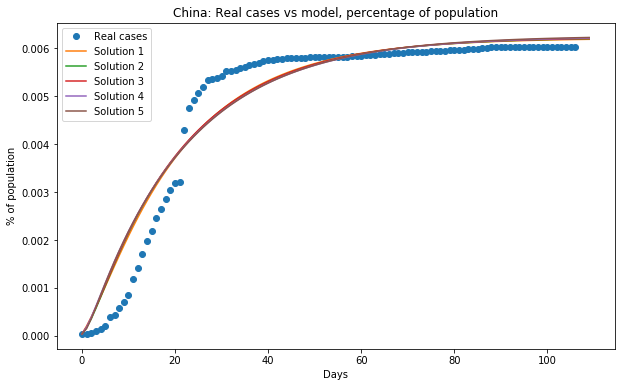

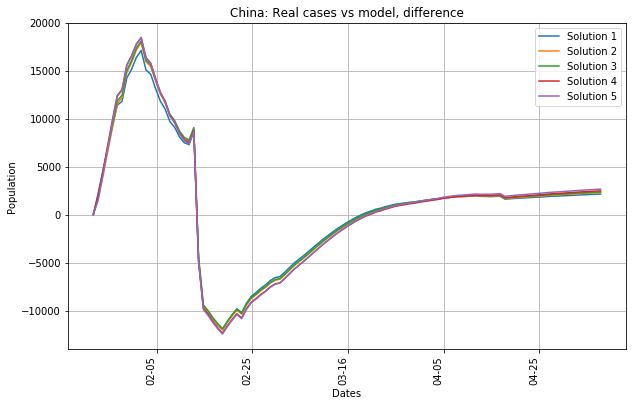

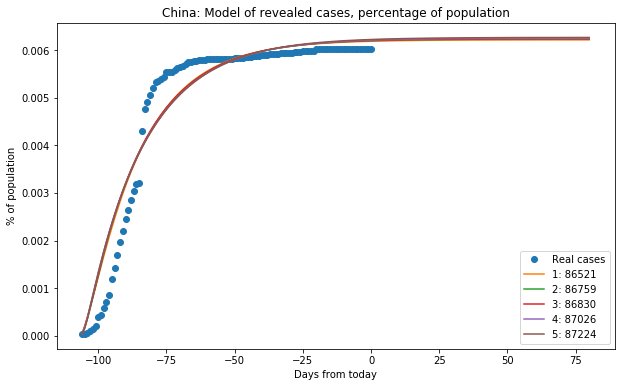

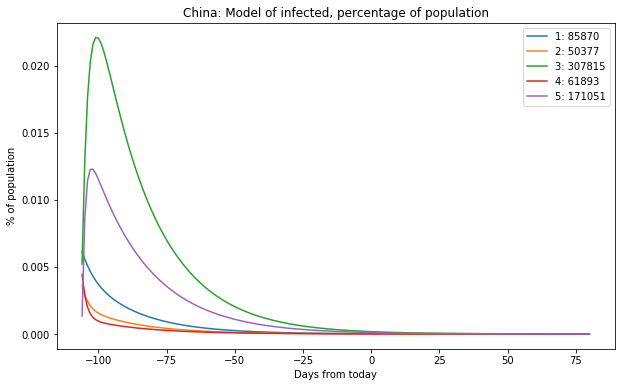

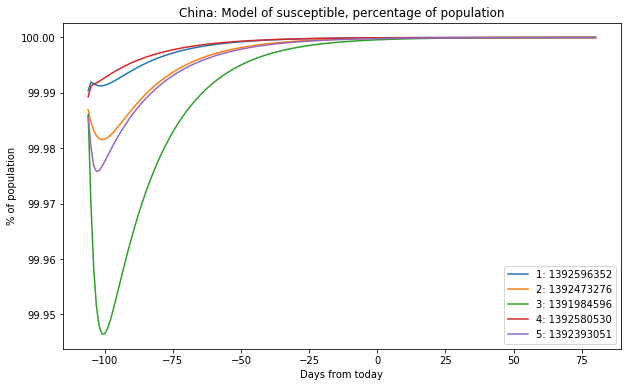

In [10]:
test_sir_sco_kc = corona.CovidModel(country, country2, model='sir_sco_kc')
test_sir_sco_kc.run(300)

## Model with incubation period and no immunity (SEIRS)

Progress: [####################] 100.0% 7487.462348563557


,alpha,beta,exposed to infected,exposed to recovered,recovered to susceptible,reveal efficiency,Infected initial,Exposed initial,Recovered initial,R0,Precision
0,3.53,1.37,1.72,2.87,0.00145,0.0319,109266.5,102708.2,48485.8,2.57,7.49e+03
1,3.34,1.85,1.63,1.42,8.01e-05,0.0379,108825.5,91367.7,2484.8,1.81,7.5e+03
2,4.29,3.74,2.07,0.365,0.00273,0.0462,108039.7,104113.3,88907.5,1.15,7.52e+03
3,1.03,1.05,2.22,0.0974,1.5,0.0368,46709.7,109552.4,61.3,0.98,7.52e+03
4,0.57,0.248,0.455,0.866,0.913,0.0359,87227.7,109467.0,108346.6,2.3,7.54e+03
5,2.2,1.78,2.43,0.68,3.07e-06,0.041,94607.5,62953.3,4353.7,1.23,7.54e+03
6,0.625,0.554,2.51,0.615,0.0369,0.0371,57709.1,79773.6,90020.4,1.13,7.54e+03
7,3.67,0.863,0.794,2.8,0.000171,0.0375,108831.5,66300.6,53804.6,4.26,7.54e+03
8,0.964,0.646,1.15,0.736,2.62,0.0355,78371.5,109292.5,35486.1,1.49,7.55e+03
9,0.681,0.395,2.08,2.01,1.52,0.039,53015.9,107825.8,1462.3,1.72,7.56e+03


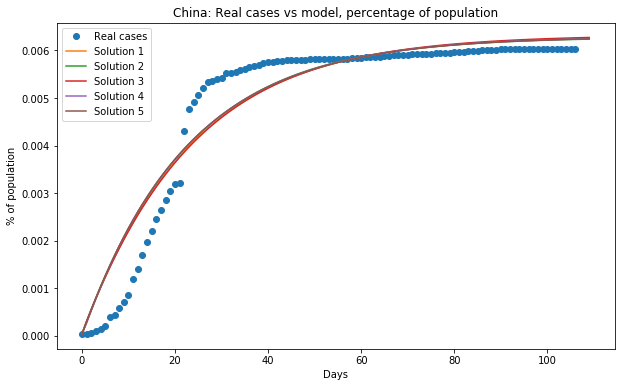

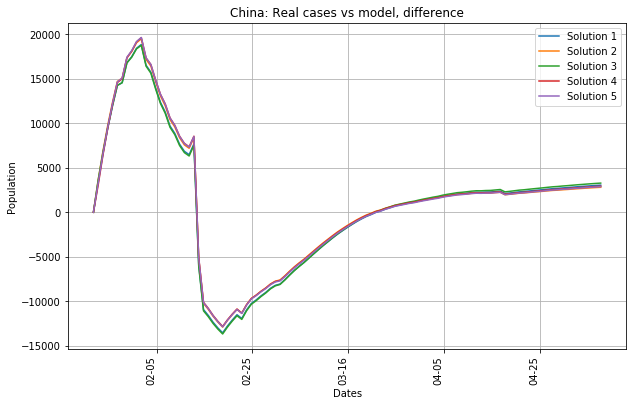

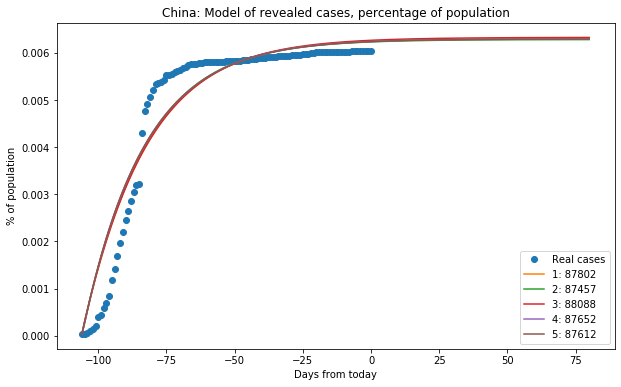

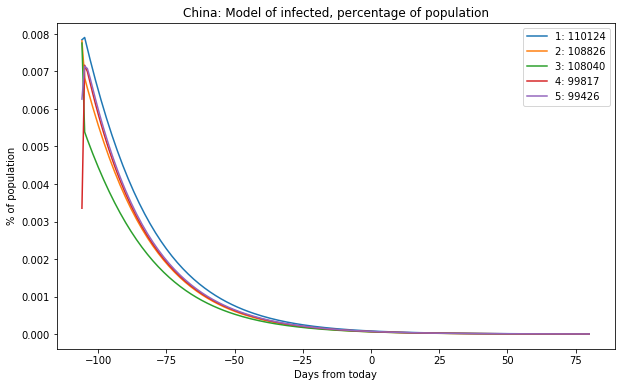

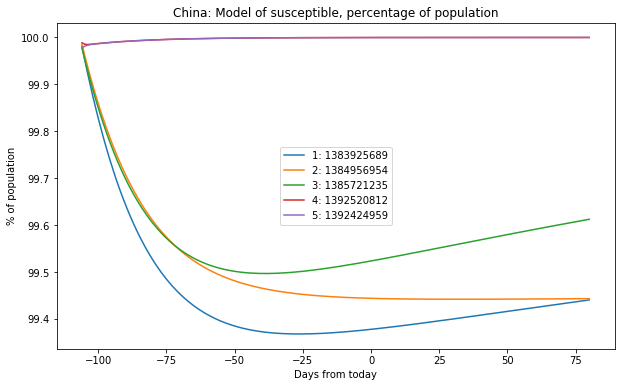

In [11]:
test_seir_so = corona.CovidModel(country, model='seir_so')
test_seir_so.run(300)

# Models with immunity

## SIR - the basic epidemiology model

Progress: [####################] 100.0% 2178.6985921029705


,alpha,beta,reveal efficiency,Infected initial,Recovered initial,R0,Precision
0,4.24,4,0.00207,108636.8,18482.0,1.06,2.18e+03
1,4.08,3.83,0.00184,105650.6,70560.9,1.07,2.32e+03
2,3.97,3.72,0.00172,109600.0,101407.0,1.07,2.35e+03
3,3.89,3.63,0.00162,109599.5,42694.9,1.07,2.41e+03
4,3.86,3.6,0.00159,109600.0,16221.1,1.07,2.43e+03
5,3.85,3.59,0.00157,109600.0,363.0,1.07,2.44e+03
6,3.53,3.26,0.00124,109600.0,109465.0,1.09,2.68e+03
7,3.5,3.22,0.00121,109600.0,10824.8,1.09,2.7e+03
8,3.49,3.21,0.0012,109599.1,8731.1,1.09,2.71e+03
9,3.49,3.21,0.00121,109600.0,102623.5,1.09,2.71e+03


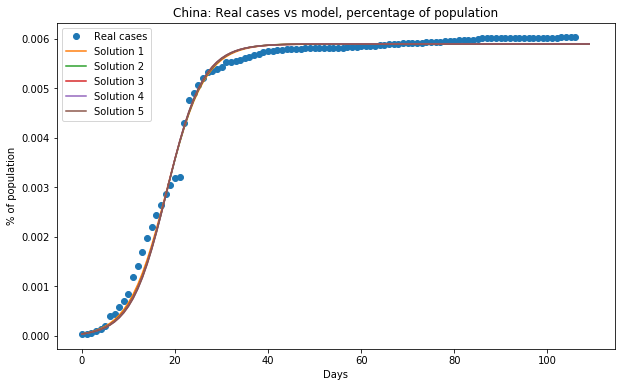

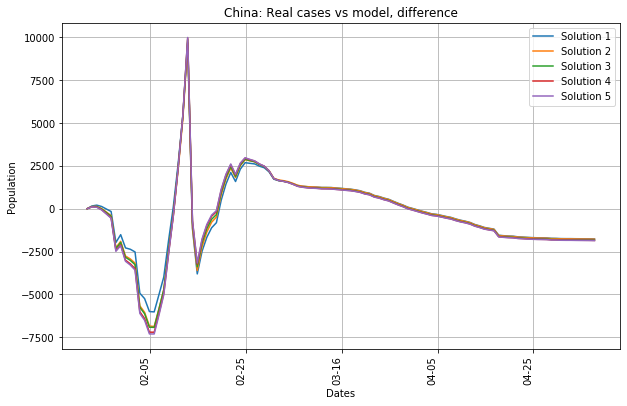

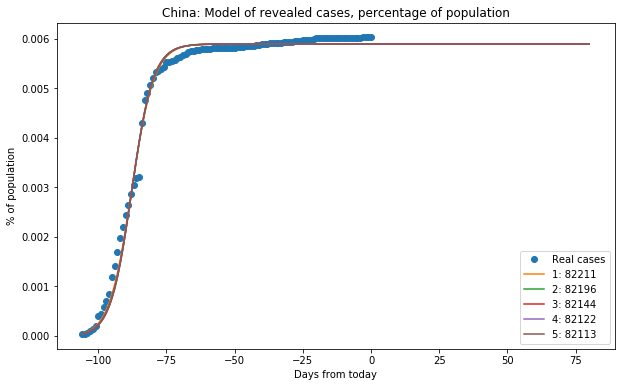

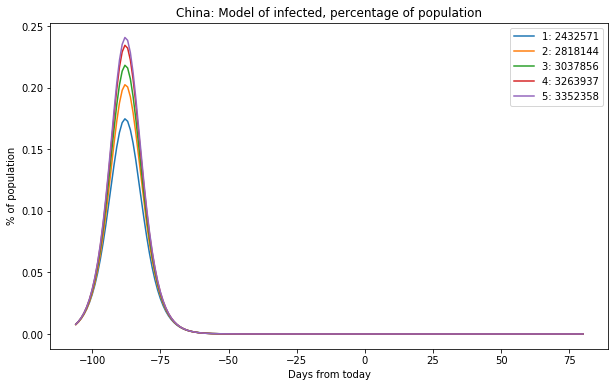

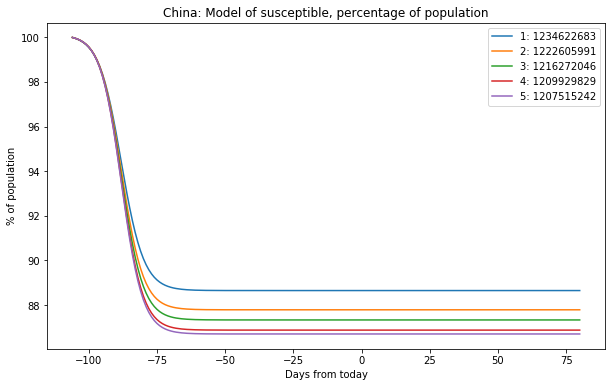

In [12]:
test_sir = corona.CovidModel(country, country2, model='sir_o_r0')

test_sir.run(500, figsize=(10, 6))

## Model with exposed (incubation period)

Progress: [####################] 100.0% 3605.84816421538


,alpha,beta,exposed to infected,exposed to recovered,reveal efficiency,Infected initial,Exposed initial,Recovered initial,R0,Precision
0,4.8,2.19,1.95,1.41,0.000562,107841.9,108165.3,17717.6,2.19,3.61e+03
1,4.7,1.52,1.64,2.14,0.000442,109599.8,109598.6,42859.0,3.09,3.71e+03
2,4.74,1.61,1.52,1.82,0.000441,109600.0,109600.0,90226.2,2.95,3.76e+03
3,5,1.83,1.3,1.33,0.000454,109600.0,109600.0,43284.6,2.73,3.85e+03
4,5,3.84,2.77,0.289,0.000867,103637.7,105892.9,65610.2,1.3,3.95e+03
5,3.43,2.2,2.4,0.461,0.000355,109600.0,109600.0,70322.0,1.56,3.95e+03
6,3.47,1.85,2.41,1.05,0.000366,93866.3,108493.5,101403.4,1.87,4.16e+03
7,3.34,1.42,1.33,0.708,0.000209,109600.0,109600.0,33364.2,2.35,4.39e+03
8,4.33,1.79,2.23,2.19,0.000633,109531.9,108688.2,34463.8,2.41,5.9e+03
9,4.74,3.76,2.78,0.789,0.0377,109600.0,109600.0,4313.7,1.26,7.35e+03


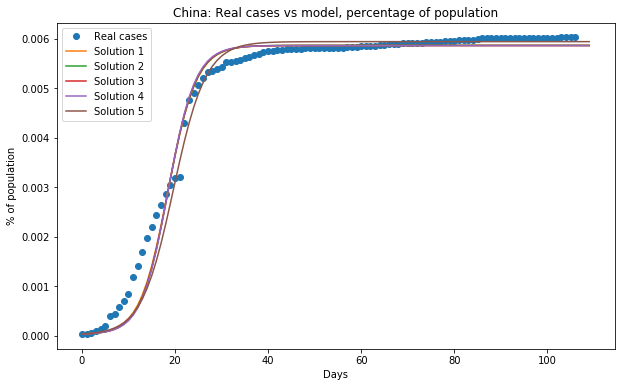

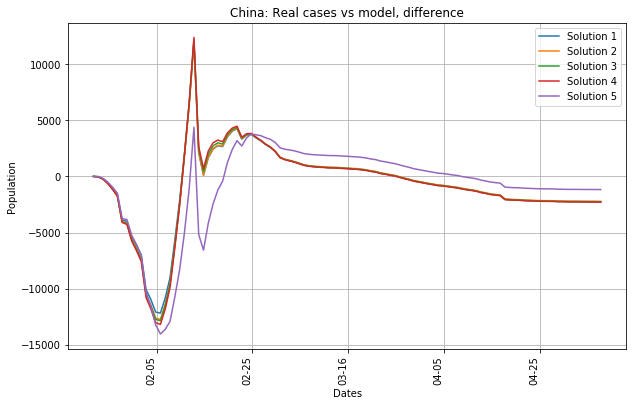

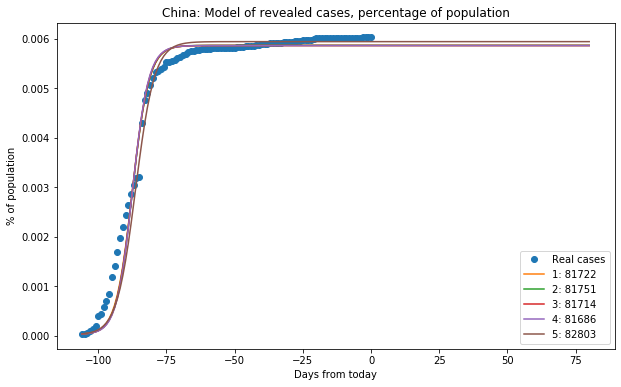

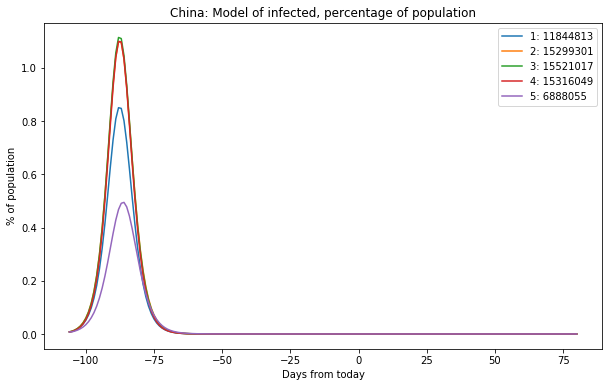

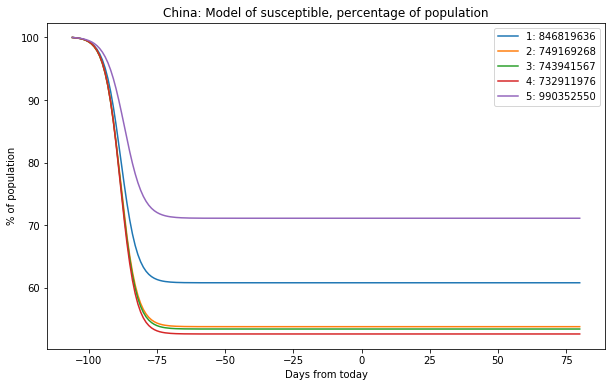

In [13]:
test_seir = corona.CovidModel(country, model='seir_o')

test_seir.run(300)